In [1]:
!pip install -r requirements.txt --quiet


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Normalization

In [2]:
data = pd.read_csv('dataset/NutriLens5.csv')
data

,Energi (kal),Protein (g),Lemak (g),Gula (g),Serat (g),Natrium (mg),Negative Score,Positif,Score,Grade
0,165.00,1.50,2.00,65.00,3.0,0.0000,14,4,10,C
1,0.00,2.70,0.90,9.80,0.0,0.1000,2,1,1,B
2,57.00,10.00,0.10,3.90,0.0,0.0900,0,5,-5,A
3,375.00,7.80,3.08,70.10,0.0,1.4000,17,4,13,D
4,163.90,15.30,1.00,0.00,0.0,1.1000,3,5,-2,A
...,...,...,...,...,...,...,...,...,...,...
104994,299.21,8.66,7.09,19.69,0.8,0.0000,14,6,8,C
104995,257.00,10.62,2.21,28.32,0.9,0.6050,11,6,5,C
104996,238.00,9.90,0.50,25.74,0.0,1.6075,7,5,2,B
104997,40.00,0.81,0.00,10.48,1.6,1.6075,2,2,0,B


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104999 entries, 0 to 104998
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Energi (kal)    104999 non-null  float64
 1   Protein (g)     104999 non-null  float64
 2   Lemak (g)       104999 non-null  float64
 3   Gula (g)        104999 non-null  float64
 4   Serat (g)       104999 non-null  float64
 5   Natrium (mg)    104999 non-null  float64
 6   Negative Score  104999 non-null  int64  
 7   Positif         104999 non-null  int64  
 8   Score           104999 non-null  int64  
 9   Grade           104999 non-null  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 8.0+ MB


In [4]:
data.describe(include='all')

,Energi (kal),Protein (g),Lemak (g),Gula (g),Serat (g),Natrium (mg),Negative Score,Positif,Score,Grade
count,1.049990e+05,104999.000000,104999.000000,104999.000000,104999.000000,104999.000000,104999.000000,104999.000000,104999.000000,104999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37370
mean,2.875606e+02,8.376449,4.394928,36.876934,2.146506,7.392016,10.889723,4.150763,6.738959,NaN
std,5.267588e+03,125.953423,10.557929,1389.747055,10.106481,1544.238736,7.826096,3.380832,7.039323,NaN
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,NaN
25%,8.500000e+01,0.420000,0.000000,6.250000,0.000000,0.020000,3.000000,1.000000,1.000000,NaN
50%,2.630000e+02,4.760000,1.100000,20.799999,0.000000,0.565000,12.000000,4.000000,6.000000,NaN
75%,4.000000e+02,10.300000,6.000000,58.820000,2.702703,1.372500,16.000000,7.000000,12.000000,NaN


In [5]:
data['Grade'].value_counts()

Grade
C    37370
D    23185
B    22654
A    14415
E     7375
Name: count, dtype: int64

In [6]:
data.sort_values(by='Lemak (g)', ascending=False).groupby('Lemak (g)').head(20)

,Energi (kal),Protein (g),Lemak (g),Gula (g),Serat (g),Natrium (mg),Negative Score,Positif,Score,Grade
8567,0.000000,42.857143,1448.5714,0.000000,0.0,1.250000,10,5,5,C
936,58000.000000,4000.000000,1200.0000,2800.000000,400.0,0.000000,30,10,20,E
10909,22000.000000,200.000000,1000.0000,2200.000000,300.0,0.000000,30,10,20,E
57319,37000.000000,3200.000000,1000.0000,0.000000,0.0,2.833333,20,5,15,D
77499,38000.000000,1800.000000,600.0000,5800.000000,400.0,0.040000,30,10,20,E
...,...,...,...,...,...,...,...,...,...,...
104016,73.000000,0.000000,0.0000,18.180000,0.0,0.000000,4,0,4,C
87421,20.000000,0.000000,0.0000,6.000000,0.0,0.000000,1,0,1,B
87395,166.666667,6.666667,0.0000,33.333333,0.0,0.000000,9,4,5,C
18003,233.000000,0.000000,0.0000,46.670000,0.0,2.417500,12,0,12,D


In [7]:
data[data['Grade'] == "C"]

,Energi (kal),Protein (g),Lemak (g),Gula (g),Serat (g),Natrium (mg),Negative Score,Positif,Score,Grade
0,165.00,1.50,2.00,65.00,3.0,0.0000,14,4,10,C
8,0.00,5.10,2.20,29.00,0.0,4.6000,8,3,5,C
12,63.00,0.20,0.00,15.50,0.0,0.0000,3,0,3,C
14,129.00,4.40,3.10,16.30,0.0,0.0000,7,2,5,C
17,222.00,11.70,2.10,38.40,0.0,0.0000,12,5,7,C
...,...,...,...,...,...,...,...,...,...,...
104988,305.00,8.59,7.81,23.44,3.1,0.0000,15,9,6,C
104991,193.00,10.08,2.52,23.53,0.8,1.2675,9,6,3,C
104994,299.21,8.66,7.09,19.69,0.8,0.0000,14,6,8,C
104995,257.00,10.62,2.21,28.32,0.9,0.6050,11,6,5,C


In [8]:
data.columns = data.columns.str.lower().str.replace(" ","_")

In [9]:
data.columns

Index(['energi_(kal)', 'protein_(g)', 'lemak_(g)', 'gula_(g)', 'serat_(g)',
       'natrium_(mg)', 'negative_score', 'positif', 'score', 'grade'],
      dtype='object')

In [10]:
X = data[['energi_(kal)', 'protein_(g)', 'lemak_(g)','gula_(g)', 'serat_(g)', 'natrium_(mg)']].values
y = data['grade'].values

In [11]:
grade_mapping = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}
y_integers = np.array([grade_mapping[grade] for grade in y])
y = tf.one_hot(y_integers, depth=len(grade_mapping))
# Convert the one-hot encoded tensor to a NumPy array
y_one_hot_array = y.numpy()

# Now you can use train_test_split with the NumPy array
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot_array, test_size=0.2, random_state=42)


In [20]:
# for normalize x feature
normalizer = Normalization(axis=-1)
normalizer.adapt(X_train)
# Define a custom callback to stop training when val_accuracy > 95%
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    min_delta=0.001,     # Minimum change in monitored quantity
    patience=10,        # Stop training after 10 epochs without improvement
    verbose=1,          # Print messages when stopping or not
    mode='min'           # Stop training when loss stops decreasing
)
            
# Create the model
model = Sequential([
    normalizer,  # normalize input

    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(5, activation='softmax')
])

# Compile the model with cross-entropy loss function and an optimizer of your choice
model.compile(optimizer= Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'mae'])


# Train the model with the callback
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=1000,
                    callbacks=[early_stopping])

Epoch 1/1000
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6721 - loss: 0.8225 - mae: 0.1671 - val_accuracy: 0.8402 - val_loss: 0.3792 - val_mae: 0.0979
Epoch 2/1000
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8246 - loss: 0.4290 - mae: 0.0991 - val_accuracy: 0.8003 - val_loss: 0.6771 - val_mae: 0.1145
Epoch 3/1000
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8414 - loss: 0.3889 - mae: 0.0896 - val_accuracy: 0.8871 - val_loss: 0.2867 - val_mae: 0.0754
Epoch 4/1000
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8560 - loss: 0.3573 - mae: 0.0829 - val_accuracy: 0.8578 - val_loss: 0.3878 - val_mae: 0.1046
Epoch 5/1000
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8635 - loss: 0.3337 - mae: 0.0776 - val_accuracy: 0.9071 - val_loss: 0.2342 - val_mae: 0.0631
Epoch 6/1000
2625/2625 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8678 - loss: 0.3300 - mae: 0.0765 - val_accuracy: 0.9159 - val_loss: 0.2159 - val_mae: 0.0565
Epoch 7/1000
262

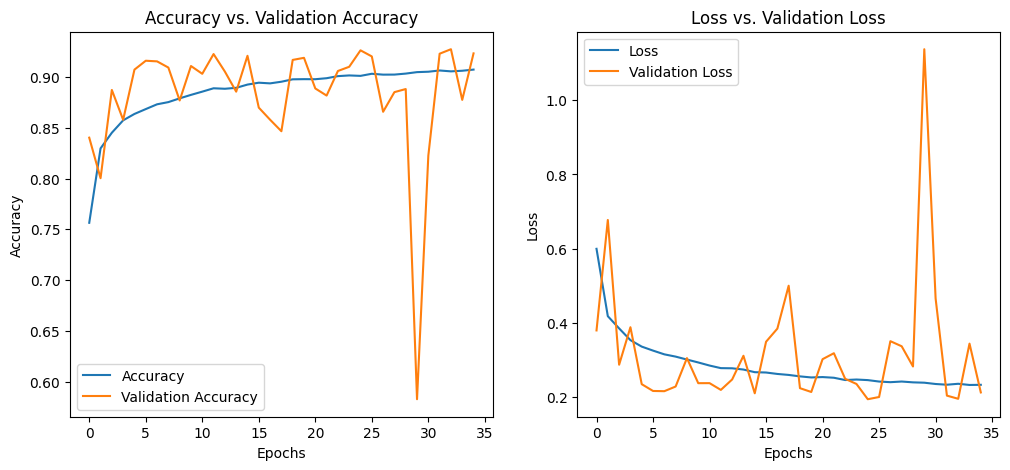

In [21]:
# Plotting accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Predict

In [42]:
model = load_model('app/model/model(1).h5', compile=False)

In [43]:
# This function doesn't use normalized for the input feature

#['energi_(kal)', 'protein_(g)', 'lemak_(g)','karbohidrat_(g)', 'serat_(g)', 'natrium_(mg)']
#{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

def output(energi, protein, lemak, karbohidrat, serat, natrium):
    index_to_grade = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E'}
    input_data = np.array([[energi, protein, lemak, karbohidrat, serat, natrium]])
    predict = model.predict(input_data)
    max_index = np.argmax(predict)
    grade = index_to_grade[max_index]
    predict = np.array2string(predict, formatter={'float_kind':'{0:.3f}'.format})
    
    return grade, predict

For old dataset contain 1000 record, if we using function that doesn't  use normalize the output is match the manual calculation, but if we are using normalize feature in predict it doesn't match the manual calculation.

In [44]:
def real_class(energi, protein, lemak, karbohidrat, serat, natrium):
    negative_score = (
        min(int(energi/ 80), 10) +
        min(int(lemak / 1), 10) +
        min(int(karbohidrat / 4.5), 10) +  
        min(int(natrium / 90), 10)
    )
    positive_score = (
        min(int(serat /0.7), 5) +
        min(int(protein / 1.6), 5) 
    )
    score = negative_score - positive_score
    if score <= -1:
        return "A"
    elif -1 < score <= 2:
        return "B"
    elif 2 < score <= 10:
        return "C"
    elif 10 < score <= 18:
        return "D"
    else:
        return "E"
    

In [45]:
#input
#['energi_(kal)', 'protein_(g)', 'lemak_(g)','karbohidrat_(g)', 'serat_(g)', 'natrium_(mg)']

result = []

data_testing = {
    "output 1" : [0.09, 2, 4, 12, 0, 220],
    "output 2" : [554, 8.3, 19.7, 39.5, 4.2, 400],
    "output 3" : [643,4.8,38.6,31.0,0,0],
    "output 4" : [500,5,12.5,0,0,300],
    "output 5" : [550,10,15,0,0,575],
    "output 6" : [533,6,23,26,0,150],
    "output 7" : [555,11,33,22,3.1,222],
    "output 8" : [484,6,8.1,33.4,0,490],
    "output 9" : [600,12,18,28,0,0],
    "output 10" : [527,5,16,55,2.7,69],
    "output 11" : [500,8,8,16,8.3,708],
    "output 12" : [500,9.09,12.5,45,4.54,227],
    "output 13" : [550,20,15,0,0,625],
    "output 14" : [536,11.3,33.6,45.2,0,88],
    "output 15" : [487,7.6,12.8,30.7,5.12,294.8],
    "output 16" : [500,6.25,21.875,31.25,6.25,187.5],
    "output 17" : [492,4.3,10.1,38.4,2.5,534],
    "output 18" : [714.2,0,57.1,0,0,571.4],
    "output 19" : [480,48,10,0,0,770],
    "output 20" : [500,8.3,8.3,33.3,0,208.3],
    "output 21" : [50,10,20,45,5,75],
    "output 22" : [500,0,12.5,5,10,850],
    "output 23" : [333,6.6,5,56.6,0,83.3],
    "output 24" : [500,0,12.5,5,10,450],
    "output 25" : [520,4,14,4,0,300],
    "output 26" : [337,8.5,1.1,22.4,8.6,220],
    "output 27" : [375,54.16,10.41,16.66,4.16,0]
}

for key, input_values in data_testing.items():
    grade, prediction = output(*input_values)
    real_grade = real_class(*input_values)
    result.append((key, grade, prediction,real_grade))
    

for item in result:
    print(f"{item[0]}, Grade: {item[1]}, Prediction: {item[2]} Real Grade: {item[3]}")

#output
#{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━

In [46]:
correct_pred = 0
for item in result:
    if item[1] == item[3]:
        correct_pred += 1
print(f'Total Correct: {correct_pred} from {len(result)}')

Total Correct: 9 from 27


Save the model

In [27]:
model.save("app/model/model(1).h5")